In [89]:
import pandas as pd
import seaborn as sns
from IPython.display import HTML
from pandas import plotting
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# 楽曲特徴データ
df_audio_features = pd.read_json('./files/target_playlist_track_features.json')
# 楽曲データ
df_tracks = pd.read_json('./files/target_playlist_track.json')
# 楽曲特徴データには、uriしかないため、楽曲データとマージして 再生URLや楽曲名を結合する
df_merge = pd.merge(left=df_tracks, right=df_audio_features, on='uri')

In [91]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               100 non-null    object 
 1   link              100 non-null    object 
 2   id_x              100 non-null    object 
 3   artists           100 non-null    object 
 4   name              100 non-null    object 
 5   id_y              100 non-null    object 
 6   key               100 non-null    int64  
 7   type              100 non-null    object 
 8   time_signature    100 non-null    int64  
 9   energy            100 non-null    float64
 10  speechiness       100 non-null    float64
 11  loudness          100 non-null    float64
 12  instrumentalness  100 non-null    float64
 13  acousticness      100 non-null    float64
 14  duration_ms       100 non-null    int64  
 15  track_href        100 non-null    object 
 16  valence           100 non-null    float64
 17

In [106]:
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(20,10)})
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

# scatter = df_merge.reindex(columns=['name', 'energy', 'liveness']).plot.scatter(x='energy', y='liveness', figsize=(10,10))
# for k, v in df_merge.reindex(columns=['name', 'energy', 'liveness']).iterrows():
#    scatter.annotate(v[0], xy=(v[1],v[2]), size=7)

# figure = sns.jointplot(x='energy', y='liveness', data=df_merge, kind='reg')
feature_names = [
    'acousticness', 
    'danceability', 
    'energy', 
    'instrumentalness',
    'liveness', 
    'loudness', 
    'speechiness', 
    # 'tempo', 
    'valence', 
    # 'duration_ms',
    'mode',
]
# scaler = StandardScaler()
# scaler.fit(df_merge[feature_names])
# scaler.transform(df_merge[feature_names])
# pd_merge_std = pd.DataFrame(scaler.transform(df_merge[feature_names]), columns=df_merge[feature_names].columns)
df_merge[feature_names].describe()
# pd_merge_std.quantile(0.5).plot.bar()
# df_merge[feature_names].mean().plot.bar()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,mode
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.055181,0.610080,0.863740,0.149760,0.246176,-4.133490,0.088257,0.385390,0.560000
std,0.092751,0.098479,0.104972,0.284131,0.173785,1.852916,0.071491,0.205423,0.498888
min,0.000006,0.373000,0.480000,0.000000,0.034300,-11.734000,0.027500,0.051100,0.000000
25%,0.003718,0.554500,0.815500,0.000017,0.096775,-4.859000,0.042625,0.221000,0.000000
50%,0.015150,0.612000,0.889500,0.000480,0.206500,-4.030000,0.060750,0.367500,1.000000
75%,0.071425,0.678500,0.941500,0.098275,0.379250,-3.133250,0.094325,0.517250,1.000000
max,0.520000,0.886000,0.989000,0.902000,0.728000,0.234000,0.449000,0.904000,1.000000


<AxesSubplot: >

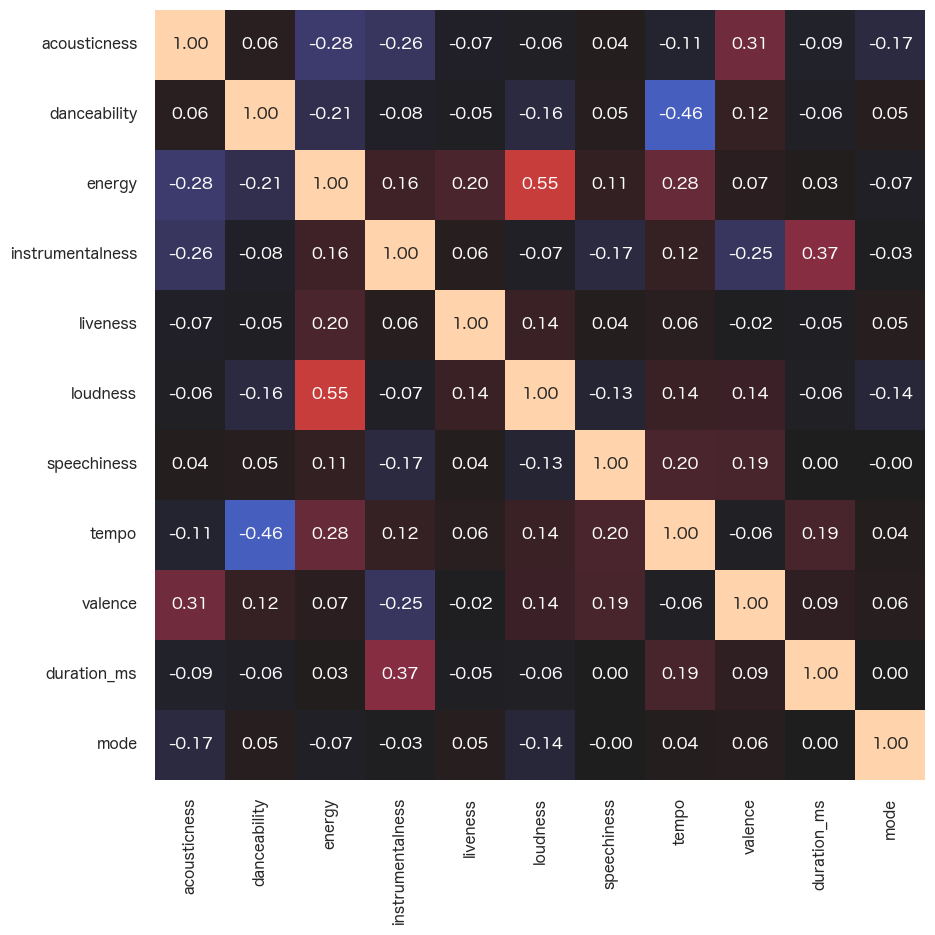

In [93]:
options = {'square':True, 'annot':True, 'fmt':'0.2f', 'xticklabels':pd_merge_std.columns, 'yticklabels':pd_merge_std.columns, 'annot_kws':{'size':12}, 'vmin':-1,'vmax':1,'center':0, 'cbar':False}
sns.heatmap(pd_merge_std.corr(), **options)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


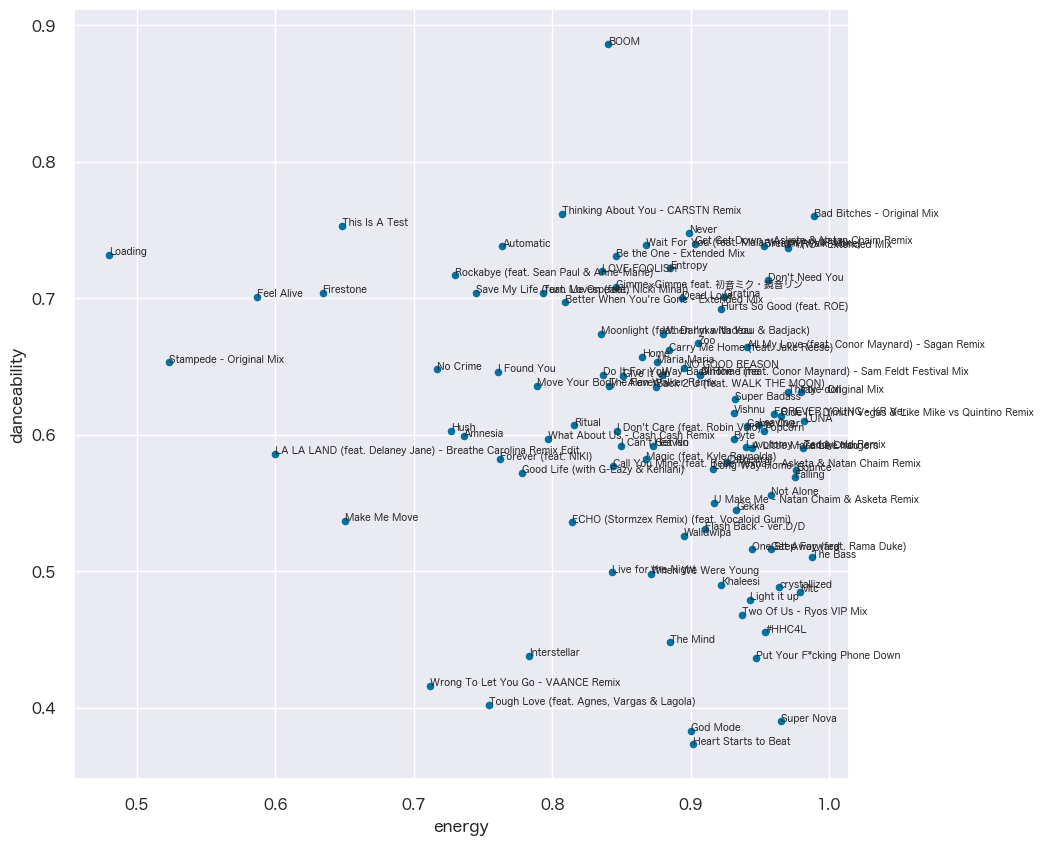

In [94]:
scatter = df_merge.reindex(columns=['name', 'energy', 'danceability']).plot.scatter(x='energy', y='danceability', figsize=(10,10))
for k, v in df_merge.reindex(columns=['name', 'energy', 'danceability']).iterrows():
    scatter.annotate(v[0], xy=(v[1],v[2]), size=7)

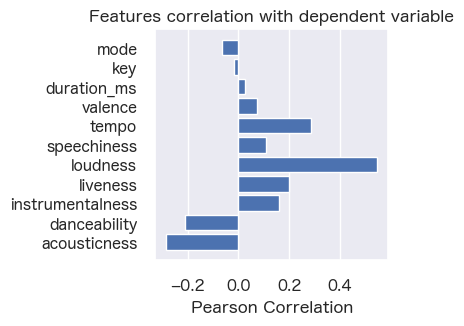

<AxesSubplot: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [95]:
from yellowbrick.target import FeatureCorrelation
import numpy as np
# 悲報: explicit / year / popularity のフィールドが亡くなっている
feature_names = [
    'acousticness', 
    'danceability', 
    # 'energy', 
    'instrumentalness',
    'liveness', 
    'loudness', 
    'speechiness', 
    'tempo', 
    'valence', 
    'duration_ms',
    'key',
    'mode',
]
X, y = df_merge[feature_names], df_merge['energy']
features = np.array(feature_names)
# ピアソン相関
visualizer = FeatureCorrelation(labels=features)
plt.rcParams['figure.figsize']=(3,3)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()